### **California House Pricing - Capstone Project Module 3**

#### Mohammad Taufik Fieri - JCDSVL

### **Contents**

1. Business Problem Understanding
2. Data Understanding
3. Data Preprocessing
4. Modeling
5. Conclusion & Recommendation

****

### **Business Problem Understanding**

**Context**

Dataset ini didasarkan pada data perumahan dari sensus di negara Amerika Serikat pada kota California di tahun 1990. Data ini bersisi lokasi, demography, dan informasi general terhadap rumah kota California.

**Problem Statement**

Setiap developer perumahan memiliki kesulitan untuk menentukan harga rumah dan juga lokasi untuk membangun rumah tersebut, agar terjadinya kesalahan pada letak rumah dan harga itu sendiri tidak akan salah.

Developer rumah tentu akan mencari lokasi yang bagus untuk membangun suatu perumahan. contoh; developer rumah tidak akan sembarangan membuat model perumahan jika tidak mengetahui atau memahami lokasi perumahan akan dibangun, pasti nya developer rumah akan ingin mengetahui perkiraan harga rumah, fasilitas, pendapatan dan lainnya terhadap lokasi perumahan yang akan di bangun. Dan hal-hal tersebut tentu berpengaruh terhadap penjualan dari rumah tersebut.


**Goals**

Tujuan adalah kebutuhan penting, karena memungkinkan kita untuk mengidentifikasi cara mendekati masalah dan mengidentifikasi jenis sistem pembelajaran mesin yang dimilikinya. Tujuan di sini adalah untuk memprediksi harga rata-rata perumahan di distrik tersebut. Ini sangat penting karena mungkin menjadi faktor penentu apakah akan berinvestasi di lokasi atau tidak.

**Analytic Approach**

Jadi, yang perlu kita lakukan adalah membuat analisa data untuk dapat menemukan pola dari fitur-fitur yang ada, yang membedakan satu properti dengan yang lainnya.

Selanjutnya, kita akan membangun suatu model regresi yang akan membantu perusahaan untuk dapat menyediakan 'tool' prediksi harga jual rumah yang baru, yang mana akan berguna untuk developer dalam menentukan lokasi serta harga rumah di suatu kawasan tertentu.


**Metric Evaluation**

Evaluasi metrik yang akan digunakan adalah RMSE, MAE, dan MAPE, di mana RMSE adalah nilai rataan akar kuadrat dari error, MAE adalah rataan nilai absolut dari error, sedangkan MAPE adalah rataan persentase error yang dihasilkan oleh model regresi. Semakin kecil nilai RMSE, MAE, dan MAPE yang dihasilkan, berarti model semakin akurat dalam memprediksi harga sewa sesuai dengan limitasi fitur yang digunakan. 

Selain itu, kita juga bisa menggunakan nilai R-squared atau adj. R-squared jika model yang nanti terpilih sebagai final model adalah model linear. Nilai R-squared digunakan untuk mengetahui seberapa baik model dapat merepresentasikan varians keseluruhan data. Semakin mendekati 1, maka semakin fit pula modelnya terhadap data observasi. Namun, metrik ini tidak valid untuk model non-linear.


### **Data Understanding**

- Dataset merupakan data perumahan berdasarkan sensus di kota California pada tahun 1990.
- Setiap baris data merepresentasikan informasi terkait propertinya.


**Attributes Information**

| **Attribute** | **Data Type** | **Description** |
| --- | --- | --- |
| Longitude | Float | A measure of how far west a house is; a higher value is farther west |
| Latitude | Float | A measure of how far north a house is; a higher value is farther north |
| Housing Median Age | Float | Median age of a house within a block; a lower number is a newer building |
| Total Rooms | Float | Total number of rooms within a block |
| Total Bedrooms | Float | Total number of bedrooms within a block |
| Population | Float | Total number of people residing within a block |
| Households | Float | Total number of households, a group of people residing within a home unit, for a block |
| Median Income | Float | Median income for households within a block of houses (measured in tens of thousands of US Dollars) |
| Ocean Proximity | Object | Location of the house w.r.t ocean/sea |
| Median House Value | Float | Median house value for households within a block (measured in US Dollars) |

<br>

In [1]:
# Import library yang dibutuhkan untuk eksplorasi dataset
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load dataset
housing = pd.read_csv('./data_california_house.csv')
display(housing.head(), housing.tail())

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-119.79,36.73,52.0,112.0,28.0,193.0,40.0,1.9750,INLAND,47500.0
1,-122.21,37.77,43.0,1017.0,328.0,836.0,277.0,2.2604,NEAR BAY,100000.0
2,-118.04,33.87,17.0,2358.0,396.0,1387.0,364.0,6.2990,<1H OCEAN,285800.0
3,-118.28,34.06,17.0,2518.0,1196.0,3051.0,1000.0,1.7199,<1H OCEAN,175000.0
4,-119.81,36.73,50.0,772.0,194.0,606.0,167.0,2.2206,INLAND,59200.0


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
14443,-121.26,38.27,20.0,1314.0,229.0,712.0,219.0,4.4125,INLAND,144600.0
14444,-120.89,37.48,27.0,1118.0,195.0,647.0,209.0,2.9135,INLAND,159400.0
14445,-121.90,36.58,31.0,1431.0,NaN,704.0,393.0,3.1977,NEAR OCEAN,289300.0
14446,-117.93,33.62,34.0,2125.0,498.0,1052.0,468.0,5.6315,<1H OCEAN,484600.0
14447,-115.56,32.80,15.0,1171.0,328.0,1024.0,298.0,1.3882,INLAND,69400.0


#### **Exploratory Data Analysis**

#### **Scatter Plot of California Housings**

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

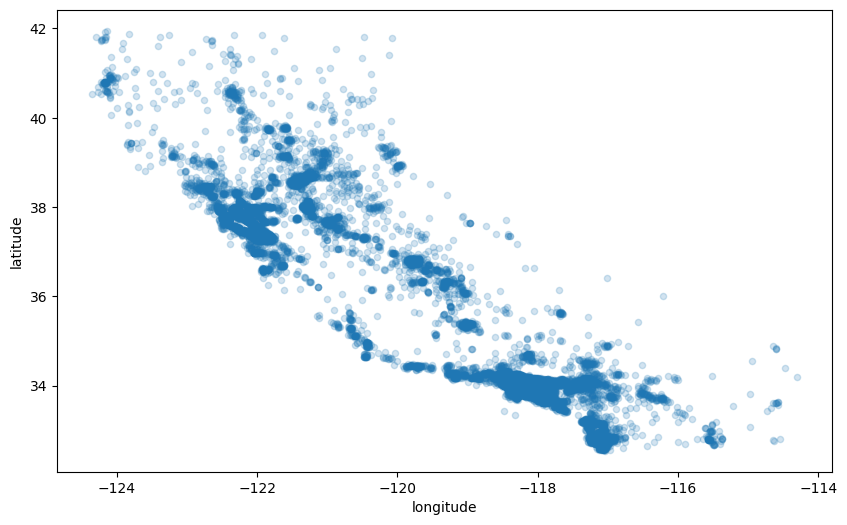

In [3]:
# Plot distribusi fitur 'price'

housing.plot(x='longitude', y='latitude',kind='scatter',alpha=0.2, figsize=(10,6))

Berdasarkan plot distribusi harga sewa Airbnb di atas, terlihat bahwa terdapat 'right-skewed distribution'. Dengan kata lain, terdapat skewness positif pada fitur price.

#### **Population Density By Median House Value**

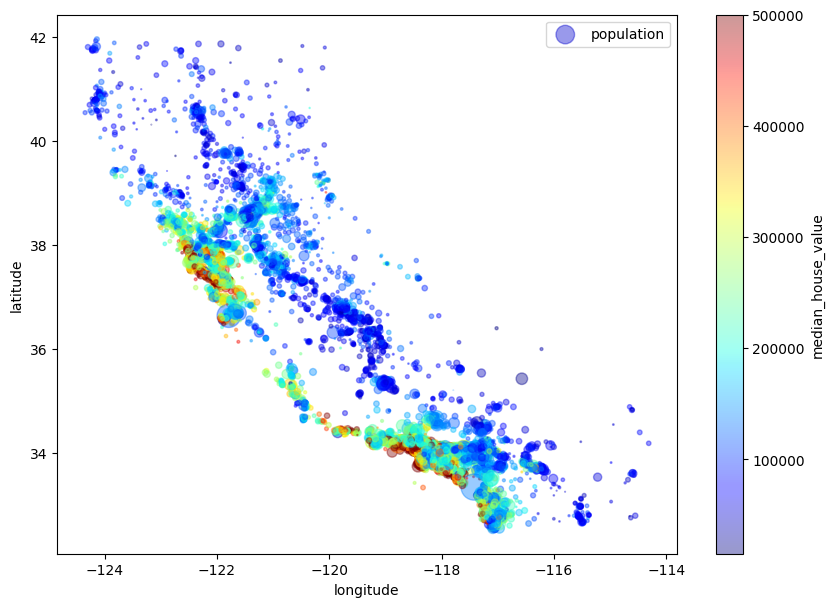

In [4]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
 s=housing["population"]/100, label="population", figsize=(10,7),
 c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
)
plt.legend()

Kita dapat mengamati bahwa lokasi dengan kepadatan tertinggi dan yang paling dekat dengan pantai atau laut adalah tempat nilai rumah median terbesar.

#### **Population By Ocean Proximity**

<AxesSubplot:xlabel='ocean_proximity', ylabel='count'>

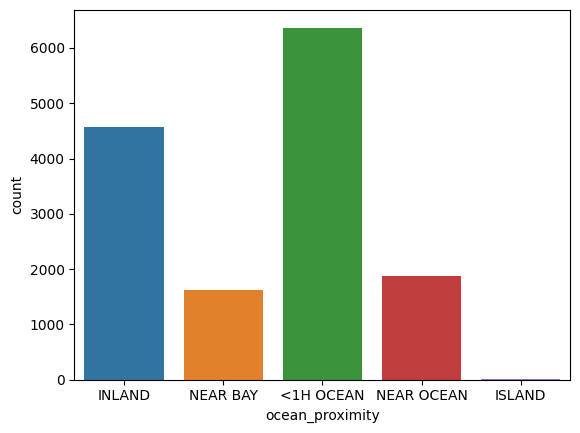

In [5]:
sns.countplot(data=housing,x='ocean_proximity')

In [68]:
housing['ocean_proximity'].value_counts()

<1H OCEAN     6369
INLAND        4576
NEAR OCEAN    1879
NEAR BAY      1622
ISLAND           2
Name: ocean_proximity, dtype: int64

Dapat terlihat bahwa banyak rumah yang berjarak kurang dari satu jam dari pantai, ini menandakan lautan berdampak pada letak/lokasi rumah pada kota California

### **Data Preprocessing**

Pada tahap ini, kita akan melakukan cleaning pada data yang nantinya data yang sudah dibersihkan akan kita gunakan untuk proses analisis selanjutnya. Beberapa hal yang perlu dilakukan adalah:

- Melakukan treatment terhadap missing value jika ada. Bisa dengan cara men-drop fiturnya jika memang tidak dibutuhkan atau bisa juga dengan meng imputasi dengan nilai yang paling masuk akal berdasarkan kasusnya.

Untuk langkah data preprocessing dan feature engineering, kita akan menggunakan dataframe hasil duplikasi dari data frame yang sebelumnya digunakan.


#### **Dataset Copy & Info**

In [6]:
# Membuat duplikasi dataframe
housing_m = housing.copy()

In [7]:
# Cek info lebih detail untuk setiap fitur
listItem = []

for col in housing_m.columns:
    listItem.append([col, housing_m[col].dtype, housing_m[col].isna().sum(), round((housing_m[col].isna().sum()/len(housing_m[col]))*100, 2),
                    housing_m[col].nunique(), list(housing_m[col].unique())]);

housing_m_desc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'],
                     data=listItem)
housing_m_desc

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,longitude,float64,0,0.00,806,"[-119.79, -122.21, -118.04, -118.28, -119.81, ..."
1,latitude,float64,0,0.00,836,"[36.73, 37.77, 33.87, 34.06, 33.8, 33.81, 38.6..."
2,housing_median_age,float64,0,0.00,52,"[52.0, 43.0, 17.0, 50.0, 11.0, 14.0, 6.0, 10.0..."
3,total_rooms,float64,0,0.00,5227,"[112.0, 1017.0, 2358.0, 2518.0, 772.0, 10535.0..."
4,total_bedrooms,float64,137,0.95,1748,"[28.0, 328.0, 396.0, 1196.0, 194.0, 1620.0, 14..."
5,population,float64,0,0.00,3498,"[193.0, 836.0, 1387.0, 3051.0, 606.0, 4409.0, ..."
6,households,float64,0,0.00,1649,"[40.0, 277.0, 364.0, 1000.0, 167.0, 1622.0, 14..."
7,median_income,float64,0,0.00,9797,"[1.975, 2.2604, 6.299, 1.7199, 2.2206, 6.67, 8..."
8,ocean_proximity,object,0,0.00,5,"[INLAND, NEAR BAY, <1H OCEAN, NEAR OCEAN, ISLAND]"
9,median_house_value,float64,0,0.00,3548,"[47500.0, 100000.0, 285800.0, 175000.0, 59200...."


Dari info dataset di atas, terdapat data yang kosong pada fitur atau kolom total bedrooms. Selanjutnya, kita perlu mengobservasi lebih lanjut terkait data-data yang hilang tersebut agar dapat menentukan langkah treatment yang tepat untuk mengatasinya.

#### **Distribustions Check**

array([[<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'housing_median_age'}>],
       [<AxesSubplot:title={'center':'total_rooms'}>,
        <AxesSubplot:title={'center':'total_bedrooms'}>,
        <AxesSubplot:title={'center':'population'}>],
       [<AxesSubplot:title={'center':'households'}>,
        <AxesSubplot:title={'center':'median_income'}>,
        <AxesSubplot:title={'center':'median_house_value'}>]],
      dtype=object)

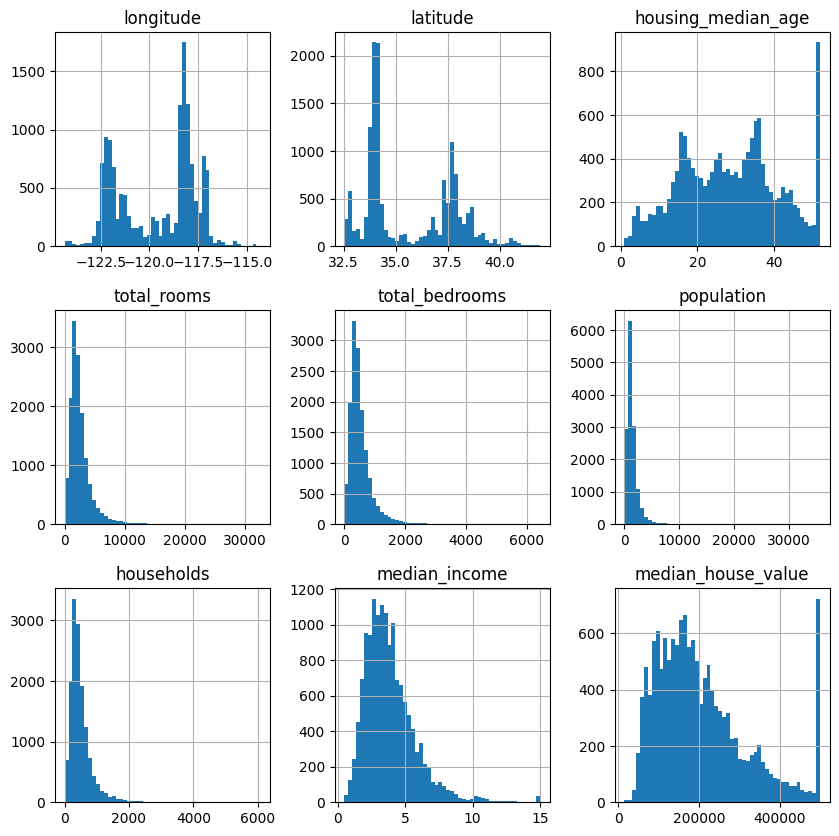

In [8]:
housing_m.hist(bins=50,figsize=(10,10))

- Pada kesan pertama, beberapa grup outlier (tidak konsisten dengan seluruh rangkaian) ada dalam dataset ini, mungkin karena cara pengambilan sampel data ( housing_median_age & median_house_value )
- Dapat terlihat juga bahwa distribusi data ini memiliki skewness yang cukup besar atau tidak normal. Dan ini dapat kita coba atasi dengan cara log scaling dengan Power Transformer dari scikitlearn agar distribusi nya dapat mendekati normal.

#### **Check Duplicate**

Kita juga dapat mengetahui bahwa tidak ada data yang duplikat pada dataset dengan melihat jumlah data unik dari fitur id, di mana jumlah data uniknya sama dengan jumlah keseluruhan data. Oleh karena itu, dataset ini tidak memiliki data yang duplikat. Untuk memastikannya, kita bisa cek dengan menggunakan function duplicated().

In [9]:
# Cek data duplikat
housing_m.duplicated().sum()

0

#### **Missing Value**

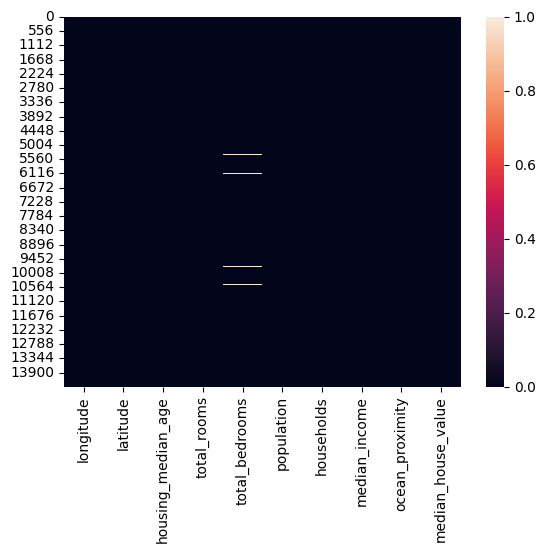

In [10]:
# Missing value heatmap
sns.heatmap(housing_m.isnull(), cbar=True);

In [11]:
housing_m.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        137
population              0
households              0
median_income           0
ocean_proximity         0
median_house_value      0
dtype: int64

Terdapat satu fitur yang memiliki missing value. Fitur total bedrooms memiliki jumlah missing value sebesar 137 data, persentase nya hanya 0.9% dari total data. Kita akan isi value tersebut dengan imputer nantinya.

#### **Data Corelation**

<AxesSubplot:>

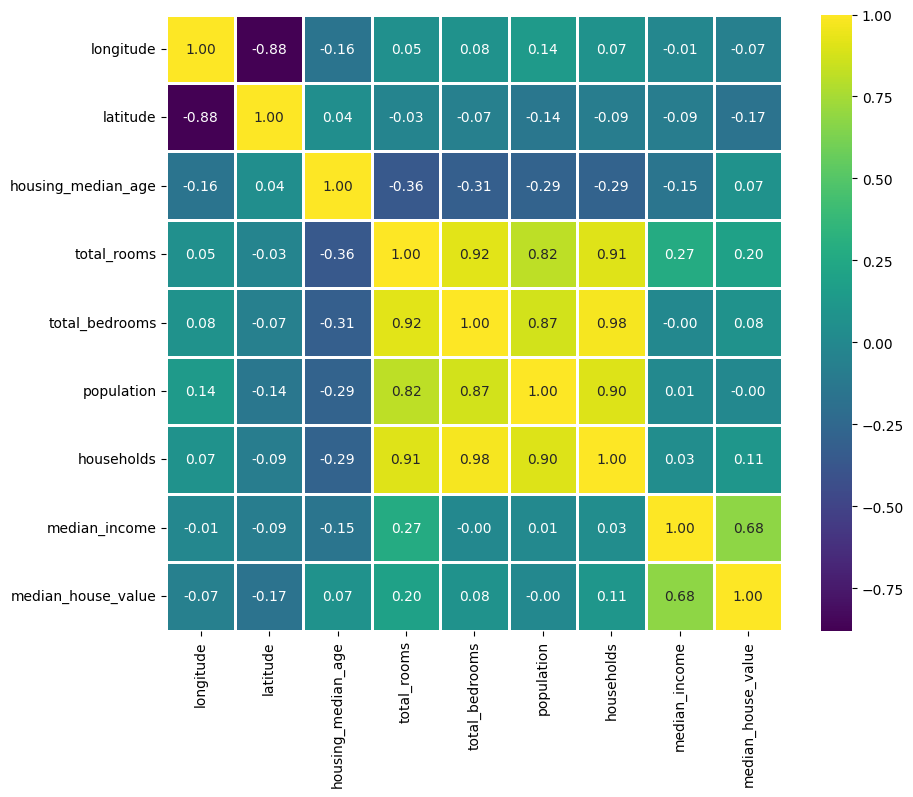

In [14]:
plt.figure(figsize=(10,8))
sns.heatmap(housing_m.corr('spearman'), annot=True, square=True, cmap='viridis', linewidths=2, fmt='.2f')

In [15]:
housing_m.corr()['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.693273
total_rooms           0.131972
housing_median_age    0.103863
households            0.061581
total_bedrooms        0.045915
population           -0.026183
longitude            -0.045777
latitude             -0.143957
Name: median_house_value, dtype: float64

- Terlihat kalau median income adalah fitur yang paling bersifat positif terhadap median house value dengan nilai 0.68, dan ini diartikan bahwa pendapatan seseorang sangat berdampak terhadap harga jual rumah tersebut.
- Dan dapat dilihat juga latitude berdampak negatif terhadap median house value dengan nilai -0.17, ini diartikan ketika letak rumah semakin ke arah utara harga jual rumah semakin menurun.


#### Data Anomaly

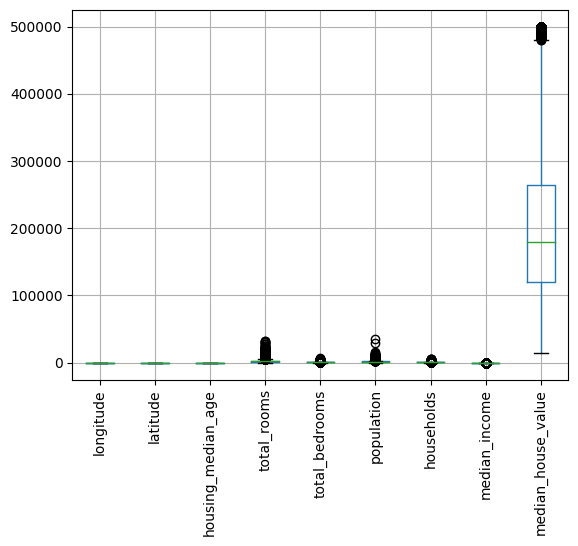

In [16]:
housing_m.boxplot(rot=90);

berdasarkan gambar dapat dilihat ada beberapa feature yang memiliki outlier. 

untuk kasus kali ini, outlier yang ada akan dihilangkan yang memiliki nilai paling extreme saja, karena jika semua outliernya dihilangkan maka akan sedikit sekali data yang tersisa. sehingga tentu saja tidak merepresentasikan data yang sebenarnya.

Terlihat ada 2 fitur yang memiliki outlier yg cukup extreme nilai nya. yaitu kolom housing median age dan kolom median house value, kedua kolom ini yang akan kita hilangkan outlier extreme nya. sedangkan untuk kolom yg lain akan kita biarkan saja outlier nya karena jika dihilangkan, maka informasi yang tersedia menjadi sedikit sekali.


<AxesSubplot:xlabel='median_house_value', ylabel='Density'>

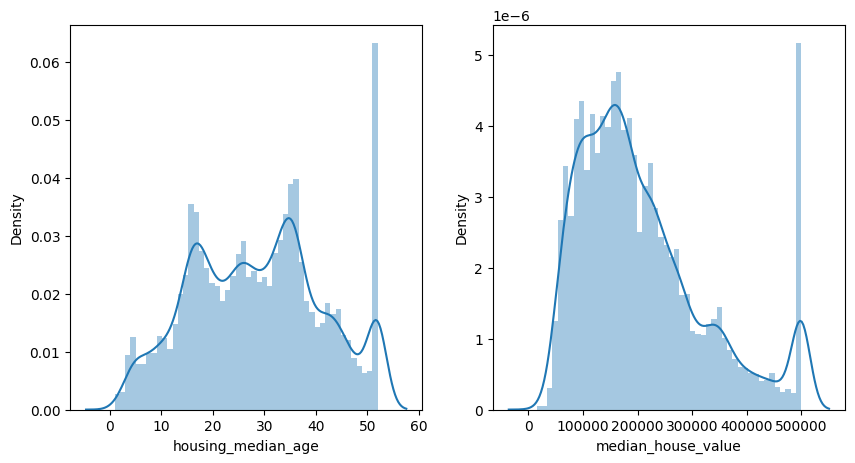

In [17]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
sns.distplot(housing_m['housing_median_age'],bins=50)

plt.subplot(1,2,2)
sns.distplot(housing_m['median_house_value'],bins=50)

<AxesSubplot:xlabel='median_house_value'>

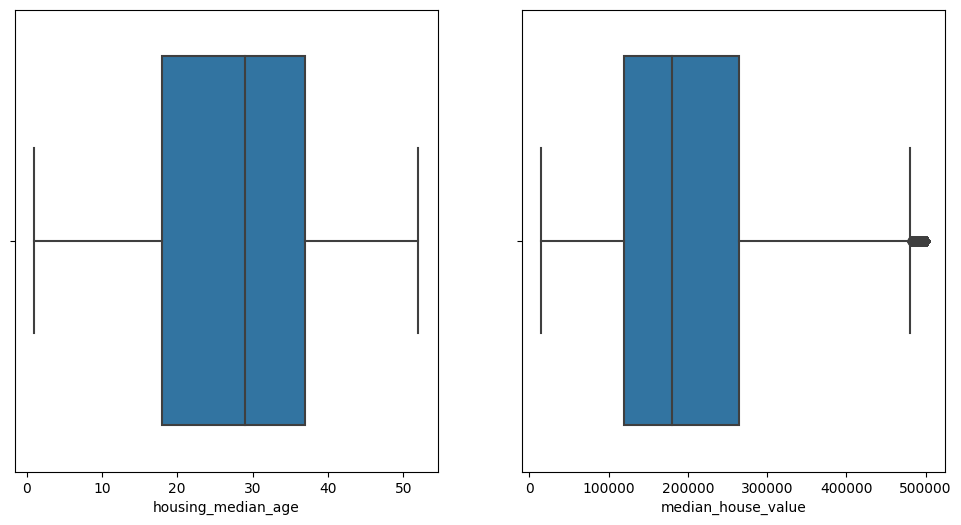

In [18]:
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
sns.boxplot(housing_m['housing_median_age'])

plt.subplot(1,2,2)
sns.boxplot(housing_m['median_house_value'])

In [19]:
# Membuat fungsi untuk mengecek outliers
def find_anomalies(data):
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    iqr = q3 - q1
    limit = iqr*1.5
    print(f'IQR: {iqr}')

    limit_bawah = q1 - limit
    limit_atas = q3 + limit
    print(f'limit_bawah: {limit_bawah}')
    print(f'limit_atas: {limit_atas}')

In [20]:
find_anomalies(housing_m['housing_median_age'])

IQR: 19.0
limit_bawah: -10.5
limit_atas: 65.5


In [21]:
pd.DataFrame(housing_m['housing_median_age'].describe())

,housing_median_age
count,14448.000000
mean,28.618702
std,12.596694
min,1.000000
25%,18.000000
50%,29.000000
75%,37.000000
max,52.000000


In [22]:
housing_m[housing_m['housing_median_age'] >= 45]['housing_median_age'].value_counts().head()

52.0    896
45.0    189
46.0    176
47.0    132
48.0    111
Name: housing_median_age, dtype: int64

In [23]:
# remove outlier feature housing median age

housing_m = housing_m.drop(housing_m[housing_m['housing_median_age'] == 52].index)
housing_m

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
1,-122.21,37.77,43.0,1017.0,328.0,836.0,277.0,2.2604,NEAR BAY,100000.0
2,-118.04,33.87,17.0,2358.0,396.0,1387.0,364.0,6.2990,<1H OCEAN,285800.0
3,-118.28,34.06,17.0,2518.0,1196.0,3051.0,1000.0,1.7199,<1H OCEAN,175000.0
4,-119.81,36.73,50.0,772.0,194.0,606.0,167.0,2.2206,INLAND,59200.0
5,-117.79,33.80,11.0,10535.0,1620.0,4409.0,1622.0,6.6700,<1H OCEAN,283200.0
...,...,...,...,...,...,...,...,...,...,...
14443,-121.26,38.27,20.0,1314.0,229.0,712.0,219.0,4.4125,INLAND,144600.0
14444,-120.89,37.48,27.0,1118.0,195.0,647.0,209.0,2.9135,INLAND,159400.0
14445,-121.90,36.58,31.0,1431.0,NaN,704.0,393.0,3.1977,NEAR OCEAN,289300.0
14446,-117.93,33.62,34.0,2125.0,498.0,1052.0,468.0,5.6315,<1H OCEAN,484600.0


In [24]:
find_anomalies(housing_m['median_house_value'])

IQR: 137850.0
limit_bawah: -88475.0
limit_atas: 462925.0


In [25]:
pd.DataFrame(housing_m['median_house_value'].describe())

,median_house_value
count,13552.000000
mean,202258.681302
std,112074.451189
min,14999.000000
25%,118300.000000
50%,176750.000000
75%,256150.000000
max,500001.000000


In [26]:
housing_m[housing_m['median_house_value'] > 450000]['median_house_value'].value_counts().head()

500001.0    552
500000.0     10
475000.0      5
483300.0      5
450400.0      3
Name: median_house_value, dtype: int64

In [27]:
housing_m = housing_m.drop(housing_m[housing_m['median_house_value'] == 500001.0].index)  
housing_m

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
1,-122.21,37.77,43.0,1017.0,328.0,836.0,277.0,2.2604,NEAR BAY,100000.0
2,-118.04,33.87,17.0,2358.0,396.0,1387.0,364.0,6.2990,<1H OCEAN,285800.0
3,-118.28,34.06,17.0,2518.0,1196.0,3051.0,1000.0,1.7199,<1H OCEAN,175000.0
4,-119.81,36.73,50.0,772.0,194.0,606.0,167.0,2.2206,INLAND,59200.0
5,-117.79,33.80,11.0,10535.0,1620.0,4409.0,1622.0,6.6700,<1H OCEAN,283200.0
...,...,...,...,...,...,...,...,...,...,...
14443,-121.26,38.27,20.0,1314.0,229.0,712.0,219.0,4.4125,INLAND,144600.0
14444,-120.89,37.48,27.0,1118.0,195.0,647.0,209.0,2.9135,INLAND,159400.0
14445,-121.90,36.58,31.0,1431.0,NaN,704.0,393.0,3.1977,NEAR OCEAN,289300.0
14446,-117.93,33.62,34.0,2125.0,498.0,1052.0,468.0,5.6315,<1H OCEAN,484600.0


extreme outlier yang ada pada feature housing median age adalah housing median age yang bernilai 52 dan terlihat ada 896 baris.  Jika dilihat dengan distribution plot jelas sekali terlihat mencolok dibandingkan data yg lain. outlier extreme ini akan kita hilangkan agar tidak mempengaruhi model machine learning nantinya.

pada feature median house value, extreme outlier nya adalah yang bernilai 500001 yang berjumlah 552. sangat mencolok dibanding data sebelumnya. extreme outlier ini juga akan kita hilangkan agar tidak mempengaruhi model machine learning nantinya.

### **Modeling**

#### **Feature Engineering**

Target: median_house_value

Categorical:
 - OneHotEncoding: ocean_proximity

Numerical:
 - Iterative Imputer: total_bedrooms

 - Logarithm Transformation (Power Transformer): housing_median_age, total_bedrooms, populations, household, median_income

 - Passthrough: longitude, latitude 


In [28]:
# Import library untuk modeling

from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV, KFold

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import SimpleImputer

import category_encoders as ce
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import PowerTransformer
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost.sklearn import XGBRegressor
from sklearn.compose import TransformedTargetRegressor

from sklearn.preprocessing import StandardScaler

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

#### **Encoding, Imputation & Transformer**

Agar dapat menggunakan semua fitur yang dipilih, maka fitur-fitur kategorikal harus diubah menjadi fitur numerikal dan beberapa fitur numerical yang akan diterapkan log scale agar model machine learning dapat bekerja dengan lebih baik. Kita dapat menggunakan ColumnTransformer untuk dapat mengubah tipe datanya, yang mana nanti dapat diaplikasikan pada pipeline model.


In [29]:
# Mengubah fitur kategorikal menjadi numerikal

cat_col = ['ocean_proximity']

num_col = [
'housing_median_age',
'total_rooms',
'population',
'households',
'median_income',
 ]


onehot = OneHotEncoder(drop='first', handle_unknown='ignore')

num_transformer = Pipeline(steps=[
    ('imputer', IterativeImputer()),
    ('scaler',PowerTransformer(method='box-cox'))
])

transformer = ColumnTransformer([
        ('onehot', OneHotEncoder(drop='first', handle_unknown='ignore'), cat_col),
        ('imp_scal', num_transformer, ['total_bedrooms']),
        ('scaler', PowerTransformer(method='box-cox'), num_col)
],remainder='passthrough')

#### **Data Splitting**

In [30]:
# Memisahkan data independen variabel dengan target
X = housing_m.drop(['median_house_value'],axis=1)
y = housing_m['median_house_value']

#### **Train and Test Splitting**

In [31]:
# Splitting data training dan test dengan proporsi 70:30
X_train, X_test, y_train, y_test= train_test_split(
    X,
    y,  
    test_size=0.3,
    random_state=1)

#### **Choose a Benchmark Model**

In [32]:
# Define algoritma yang digunakan
lr = LinearRegression()
knn = KNeighborsRegressor()
dt = DecisionTreeRegressor(random_state=1)
rf = RandomForestRegressor(random_state=1)
xgb = XGBRegressor(random_state=1)

# Pemodelan dilakukan dalam skala logaritmik, namun kemudian di-inverse kembali untuk interpretasi
log_lr = TransformedTargetRegressor(lr, func=np.log, inverse_func=np.exp)
log_knn = TransformedTargetRegressor(knn, func=np.log, inverse_func=np.exp)
log_dt = TransformedTargetRegressor(dt, func=np.log, inverse_func=np.exp)
log_rf = TransformedTargetRegressor(rf, func=np.log, inverse_func=np.exp)
log_xgb = TransformedTargetRegressor(xgb, func=np.log, inverse_func=np.exp)

# Scaling data
scaler = StandardScaler()

# Kandidat algoritma
models = [log_lr, log_knn, log_dt, log_rf, log_xgb]

score_rmse = []
nilai_mean_rmse = []
nilai_std_rmse = []

score_mae = []
nilai_mean_mae = []
nilai_std_mae = []

score_mape = []
nilai_mean_mape = []
nilai_std_mape = []

# Mencari algoritma terbaik berdasarkan nilai MAE
for i in models:
    
    crossval = KFold(n_splits=5, shuffle=True, random_state=1)

    estimator = Pipeline([
        ('preprocessing', transformer),
        ('scaler', scaler),
        ('model', i)
    ])

    # RMSE
    model_cv_rmse = cross_val_score(
        estimator, 
        X_train, 
        y_train, 
        cv=crossval, 
        scoring='neg_root_mean_squared_error', 
        error_score='raise'
        )

    print(model_cv_rmse, i)

    score_rmse.append(model_cv_rmse)
    nilai_mean_rmse.append(model_cv_rmse.mean())
    nilai_std_rmse.append(model_cv_rmse.std())

    # MAE
    model_cv_mae = cross_val_score(
        estimator, 
        X_train, 
        y_train, 
        cv=crossval, 
        scoring='neg_mean_absolute_error', 
        error_score='raise'
        )

    print(model_cv_mae, i)

    score_mae.append(model_cv_mae)
    nilai_mean_mae.append(model_cv_mae.mean())
    nilai_std_mae.append(model_cv_mae.std())

    # MAPE
    model_cv_mape = cross_val_score(
        estimator, 
        X_train, 
        y_train, 
        cv=crossval, 
        scoring='neg_mean_absolute_percentage_error', 
        error_score='raise'
        )

    print(model_cv_mape, i)

    score_mape.append(model_cv_mape)
    nilai_mean_mape.append(model_cv_mape.mean())
    nilai_std_mape.append(model_cv_mape.std())

[-54552.7979207  -57063.10683874 -59435.31480359 -58442.90086574
 -59095.36016712] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=LinearRegression())
[-38961.67428224 -40052.8188547  -40672.05491933 -40699.19373011
 -41385.60358513] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=LinearRegression())
[-0.22838717 -0.22724686 -0.22347962 -0.23836682 -0.23793193] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=LinearRegression())
[-53734.05614383 -56204.50011251 -57356.81256681 -56103.08745531
 -57283.83392714] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=KNeighborsRegressor())
[-36709.0895813  -38588.2089677  -38688.3120257  -37995.07074671
 -38851.87071123] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,


In [33]:
# Evaluasi hasil dari 5 kandidat algoritma yang digunakan
pd.DataFrame({
    'Model': ['Linear Regression', 'KNN Regressor', 'DecisionTree Regressor', 'RandomForest Regressor', 'XGBoost Regressor'],
    'Mean_RMSE': nilai_mean_rmse,
    'Std_RMSE': nilai_std_rmse,
    'Mean_MAE': nilai_mean_mae,
    'Std_MAE': nilai_std_mae,
    'Mean_MAPE': nilai_mean_mape,
    'Std_MAPE': nilai_std_mape
})

,Model,Mean_RMSE,Std_RMSE,Mean_MAE,Std_MAE,Mean_MAPE,Std_MAPE
0,Linear Regression,-57717.896119,1778.716483,-40354.269074,814.101250,-0.231082,0.005996
1,KNN Regressor,-56136.458041,1310.191954,-38166.510407,784.001578,-0.211375,0.004415
2,DecisionTree Regressor,-64568.842428,1761.141619,-42913.022198,691.559186,-0.244450,0.006767
3,RandomForest Regressor,-46805.343741,1868.204116,-30979.613371,789.048037,-0.172760,0.004449
4,XGBoost Regressor,-45147.620756,1575.126801,-29830.177351,715.948973,-0.166706,0.003190


Terdapat perbedaan cukup signifikan antara nilai RMSE dan MAE, di mana nilai RMSE lebih tinggi karena nilai residuals atau error-nya dikuadratkan terlebih dahulu sebelum dirata-ratakan. Hal ini menyebabkan RMSE akan memberikan 'weight' yang lebih tinggi untuk nilai error yang besar. Dengan kata lain, terdapat nilai-nilai error yang besar yang dihasilkan oleh semua algoritma yang digunakan, sehingga ada perbedaan signifikan antara nilai RMSE dan MAE.

- Berdasarkan nilai RMSE, XGBoost adalah model terbaik. Sedangkan jika berdasarkan nilai MAE dan MAPE, RandomForest memiliki nilai paling rendah.

- Selanjutnya, akan dilakukan prediksi pada test set dengan 2 benchmark model terbaik, yaitu XGBoost dan RandomForest. 

#### **Predict to Test Set with the Benchmark Model**

Prediksi pada test set dengan menggunakan model XGBoost dan Random Forest

In [34]:
# Benchmark 2 model terbaik
models = {
    'XGB': XGBRegressor(random_state=1),
    'RandomForest': RandomForestRegressor(random_state=1)
}

score_rmse = []
score_mae = []
score_mape = []

# Prediksi pada test set
for i in models:

    model = Pipeline([
        ('preprocessing', transformer),
        ('scaler', scaler),
        ('model', models[i])
        ])

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score_rmse.append(np.sqrt(mean_squared_error(y_test, y_pred)))
    score_mae.append(mean_absolute_error(y_test, y_pred))
    score_mape.append(mean_absolute_percentage_error(y_test, y_pred))

score_before_tuning = pd.DataFrame({'RMSE': score_rmse, 'MAE': score_mae, 'MAPE': score_mape}, index=models.keys())
score_before_tuning

,RMSE,MAE,MAPE
XGB,44573.206308,30216.548050,0.180283
RandomForest,46192.791974,31248.906082,0.187621


- Ketika dilakukan prediksi pada test set, performa XGBoost secara akumulatif sedikit lebih baik. Hal ini dapat dilihat dari nilai RMSE dan MAE yang sedikit lebih rendah dari RandomForest.


#### **Hyperparameter Tuning**

Karena model XGBoost memiliki performa yang sedikit lebih baik dari RandomForest, maka selanjutnya kita akan menggunakan model XGBoost ini sebagai model akhir. Pada tahap ini, kita akan melakukan hyperparameter tuning pada model XGBoost dengan harapan dapat meningkatkan performa model.

Untuk panduan tuning model XGBoost, dapat merujuk ke [Tuning XGBoost](https://xgboost.readthedocs.io/en/latest/parameter.html#general-parameters).

In [35]:
# Kedalaman pohon
max_depth = list(np.arange(1, 11))

# Learning rate
learning_rate = list(np.arange(1, 100)/100)

# Jumlah pohon
n_estimators = list(np.arange(100, 201))

# Jumlah baris tiap pohon (% dari total baris train set)
subsample = list(np.arange(2, 10)/10)

# Gamma (min_impurity_decrease)
gamma = list(np.arange(1, 11)) # Semakin besar nilainya, semakin konservatif/simpel modelnya

# Jumlah feature yang digunakan untuk tiap pohon (% dari total kolom train set)
colsample_bytree = list(np.arange(1, 10)/10)

# Alpha (regularization)
reg_alpha = list(np.logspace(-3, 1, 10)) # Semakin besar nilainya, semakin konservatif/simpel modelnya


# Hyperparam space XGboost
hyperparam_space_xgb = {
    'model__max_depth': max_depth, 
    'model__learning_rate': learning_rate,
    'model__n_estimators': n_estimators,
    'model__subsample': subsample,
    'model__gamma': gamma,
    'model__colsample_bytree': colsample_bytree,
    'model__reg_alpha': reg_alpha
}

In [36]:
# Benchmark model dengan hyperparameter tuning
xgb = XGBRegressor(random_state=1, verbosity=0)

# Membuat algorithm chains
estimator_xgb = Pipeline([
        ('preprocessing', transformer),
        ('scaler', scaler),
        ('model', xgb)
        ])

crossval = KFold(n_splits=5, shuffle=True, random_state=1)

# Hyperparameter tuning
random_xgb = RandomizedSearchCV(
    estimator_xgb, 
    param_distributions = hyperparam_space_xgb,
    n_iter = 50,
    cv = crossval, 
    scoring = ['neg_root_mean_squared_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error'], 
    n_jobs = -1,
    refit = 'neg_root_mean_squared_error', # Hanya bisa memilih salah stau metric untuk optimisasi
    random_state = 1  
)

In [37]:
# Fitting data training untuk mencari parameter terbaik
random_xgb.fit(X_train, y_train)

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=1, shuffle=True),
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('onehot',
                                                                               OneHotEncoder(drop='first',
                                                                                             handle_unknown='ignore'),
                                                                               ['ocean_proximity']),
                                                                              ('imp_scal',
                                                                               Pipeline(steps=[('imputer',
                                                                                                IterativeImputer()),
                                                                                               ('scaler',
                                                                                                PowerTransformer(method='box-co...
                                                             0.007742636826811269,
                                                             0.021544346900318832,
                                                             0.05994842503189409,
                                                             0.1668100537200059,
                                                             0.46415888336127775,
                                                             1.2915496650148828,
                                                             3.593813663804626,
                                                             10.0],
                                        'model__subsample': [0.2, 0.3, 0.4, 0.5,
                                                             0.6, 0.7, 0.8,
                                                             0.9]},
                   random_state=1, refit='neg_root_mean_squared_error',
                   scoring=['neg_root_mean_squared_error',
                            'neg_mean_absolute_error',
                            'neg_mean_absolute_percentage_error'])

In [38]:
# Melihat hasil tuning dalam bentuk dataframe. Diurutkan berdasarkan RMSE, MAE & MAPE
pd.DataFrame(random_xgb.cv_results_).sort_values(by=['rank_test_neg_root_mean_squared_error', 'rank_test_neg_mean_absolute_error', 'rank_test_neg_mean_absolute_percentage_error']).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__subsample,param_model__reg_alpha,param_model__n_estimators,param_model__max_depth,param_model__learning_rate,param_model__gamma,...,std_test_neg_mean_absolute_error,rank_test_neg_mean_absolute_error,split0_test_neg_mean_absolute_percentage_error,split1_test_neg_mean_absolute_percentage_error,split2_test_neg_mean_absolute_percentage_error,split3_test_neg_mean_absolute_percentage_error,split4_test_neg_mean_absolute_percentage_error,mean_test_neg_mean_absolute_percentage_error,std_test_neg_mean_absolute_percentage_error,rank_test_neg_mean_absolute_percentage_error
7,1.816779,0.044549,0.029600,0.002579,0.9,0.059948,119,8,0.05,5,...,812.251588,1,-0.168938,-0.175420,-0.169351,-0.174294,-0.181723,-0.173945,0.004669,1
20,0.955608,0.018630,0.020400,0.003558,0.9,0.007743,143,4,0.38,6,...,1178.156743,2,-0.178213,-0.189605,-0.184385,-0.189524,-0.194707,-0.187287,0.005589,2
8,1.584510,0.051483,0.027605,0.003610,0.7,0.021544,182,6,0.31,2,...,777.557867,4,-0.196088,-0.195415,-0.199101,-0.197327,-0.197822,-0.197151,0.001298,4
17,1.723461,0.029525,0.025203,0.002316,0.6,0.001,190,5,0.04,9,...,1013.815169,3,-0.185410,-0.191433,-0.184132,-0.195183,-0.201876,-0.191607,0.006520,3
3,1.182200,0.029322,0.032401,0.004220,0.5,0.021544,166,8,0.1,9,...,690.094316,5,-0.195130,-0.200314,-0.194323,-0.201216,-0.200539,-0.198305,0.002948,5


In [39]:
# Cek skor dan params terbaik
print('XGBoost')
print('Best_score:', random_xgb.best_score_)
print('Best_params:', random_xgb.best_params_)

XGBoost
Best_score: -43999.51671174857
Best_params: {'model__subsample': 0.9, 'model__reg_alpha': 0.05994842503189409, 'model__n_estimators': 119, 'model__max_depth': 8, 'model__learning_rate': 0.05, 'model__gamma': 5, 'model__colsample_bytree': 0.8}


#### **Predict to Test Set with the Tuned Model**

Melakukan prediksi pada test set dengan menggunakan model XGBoost dan hyperparameter terpilih.

In [40]:
# Model XGBoost
model = {'XGB': XGBRegressor(random_state=1)}

# Define model terhadap estimator terbaik
xgb_tuning = random_xgb.best_estimator_

# Fitting model
xgb_tuning.fit(X_train, y_train)

# Predict test set
y_pred_xgb_tuning = xgb_tuning.predict(X_test)

# Simpan nilai metrics RMSE, MAE & MAPE setelah tuning
rmse_xgb_tuning = np.sqrt(mean_squared_error(y_test, y_pred_xgb_tuning))
mae_xgb_tuning = mean_absolute_error(y_test, y_pred_xgb_tuning)
mape_xgb_tuning = mean_absolute_percentage_error(y_test, y_pred_xgb_tuning)

score_after_tuning = pd.DataFrame({'RMSE': rmse_xgb_tuning, 'MAE': mae_xgb_tuning, 'MAPE': mape_xgb_tuning}, index=model.keys())
score_after_tuning

,RMSE,MAE,MAPE
XGB,43092.637069,28922.175661,0.171987


#### **Performance Comparison**

Perbandingan performa model XGBoost sebelum dan sesudah dilakukan hyperparameter tuning.

In [41]:
# Sebelum hyperparameter tuning
pd.DataFrame(score_before_tuning.loc['XGB']).T

,RMSE,MAE,MAPE
XGB,44573.206308,30216.54805,0.180283


In [42]:
# Setelah hyperparameter tuning
score_after_tuning

,RMSE,MAE,MAPE
XGB,43092.637069,28922.175661,0.171987


Model mengalami peningkatan performa (nilai RMSE, MAE & MAPE berkurang) dengan dilakukannya hyperparameter tuning, walaupun hanya sedikit.
- RMSE, MAE & MAPE sebelum tuning: 44573.20, 30216.54, 0.18
- RMSE, MAE & MAPE setelah tuning: 43092.63, 28922.17, 0.17

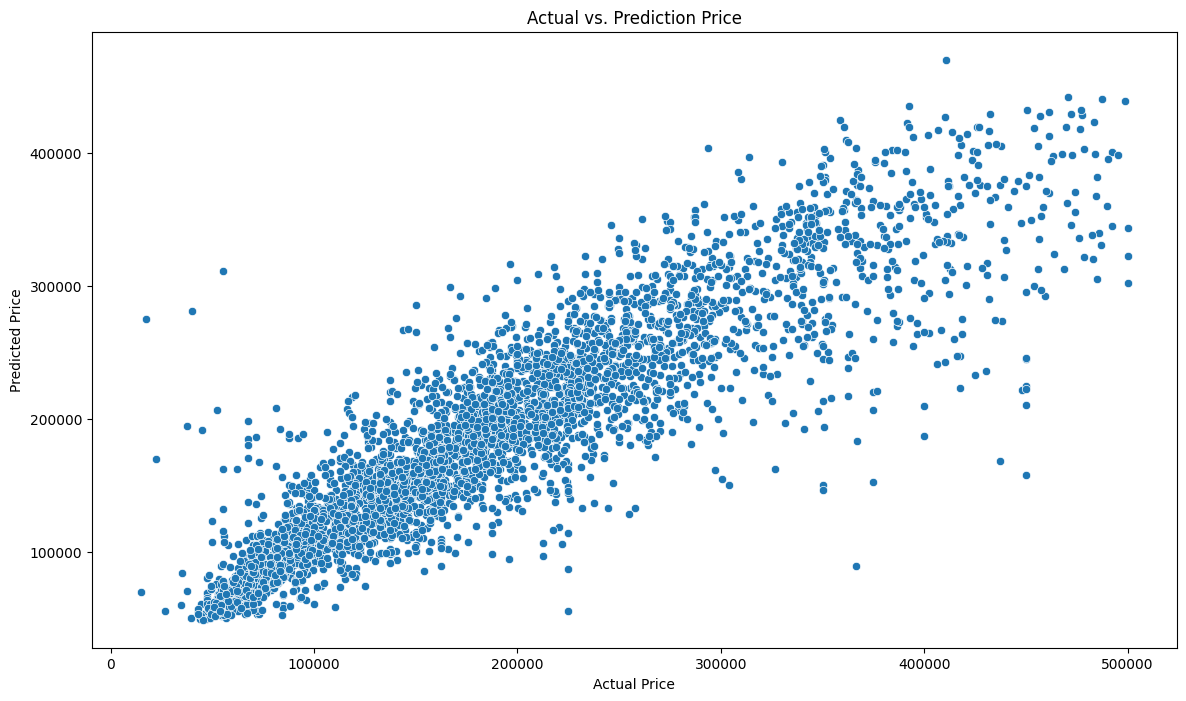

In [43]:
plt.figure(figsize=(14, 8))
plot = sns.scatterplot(x=y_test, y=y_pred_xgb_tuning).set(title='Actual vs. Prediction Price', 
                                               xlabel='Actual Price', 
                                               ylabel='Predicted Price');

Perbandingan antara nilai harga yang diprediksi dengan harga actual terlihat cukup bagus dengan membentuk suatu pola yg linear. Masih terdapat sedikit error yang terkadang data yang diprediksi nilainya lebih rendah namun nilai aktualnya tinggi. tetapi hal ini masih dalam batasan yang normal mengingat nilai MAPE yang didapat yaitu 17% dimana artinya dapat dikategorikan kedalam 'Good forecast'

Source: Lewis, C. D. (1982). Industrial and business forecasting methods: A practical guide to exponential smoothing and curve fitting


#### **Feature Importances**

Untuk dapat mengetahui sebenarnya fitur apa saja yang sangat memengaruhi target (price), kita dapat mengeceknya melalui function feature_importances_.

In [44]:
# Plot feature importances

features = (list(transformer.transformers_[0][1].get_feature_names()) + 
                transformer.transformers_[1][2] + 
                transformer.transformers_[2][2] + 
                ['longitude','latitude'])

features

['x0_INLAND',
 'x0_ISLAND',
 'x0_NEAR BAY',
 'x0_NEAR OCEAN',
 'total_bedrooms',
 'housing_median_age',
 'total_rooms',
 'population',
 'households',
 'median_income',
 'longitude',
 'latitude']

In [45]:
feature_importances = pd.DataFrame(data=xgb_tuning[2].feature_importances_, index=features, columns=["coef"])
feature_importances.sort_values(by=["coef"], ascending=False, inplace=True)
feature_importances

,coef
x0_INLAND,0.469769
median_income,0.239959
latitude,0.070400
longitude,0.069918
x0_NEAR OCEAN,0.035436
population,0.025099
total_rooms,0.020592
housing_median_age,0.020008
households,0.017974
x0_NEAR BAY,0.016789


<AxesSubplot:>

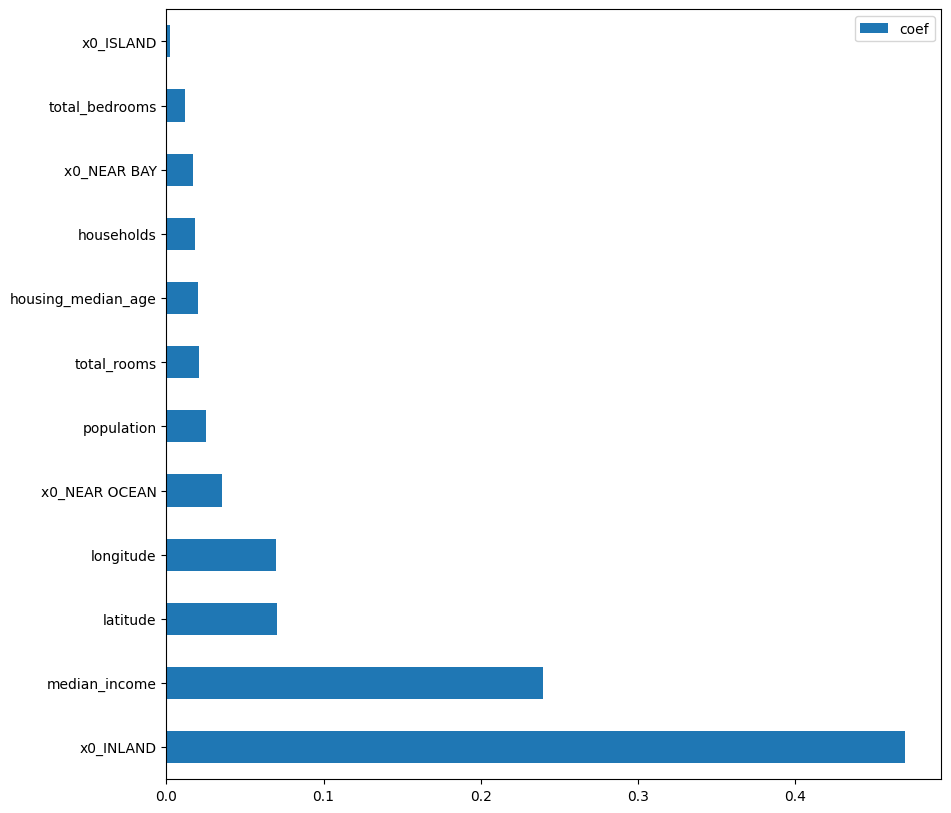

In [46]:
feature_importances.plot(kind="barh", figsize=(10,10))

### Conclusions & Recommendations

#### **Conclusion**

Berdasarkan pemodelan yang sudah dilakukan, fitur 'ocean_proximity' dan 'median_income' menjadi fitur yang paling berpengaruh terhadap 'median_house_value'.

  - Metrik evaluasi yang digunakan pada model adalah nilai RMSE, MAE & MAPE. Jika ditinjau dari nilai MAPE yang dihasilkan oleh model setelah dilakukan hyperparameter tuning, yaitu sebesar ~17%, kita dapat menyimpulkan bahwa bila nanti model yang kita buat ini digunakan untuk memperkirakan harga perumahan perumahan di kota California. Pada kali ini kita lebih mengambil nilai MAPE di karenakan nilai RMSE yang cenderung tergantung pada skala dari data tersebut, semakin besar skala nya otomatis lebih besar nilai RMSE nya. Outlier pun juga sangat berpengaruh terhadap nilai RMSE, dan seperti yang sudah terlihat nilai outlier pada data ini cukup banyak dan tidak bisa di hilangkan semua karena akan menurunkan kredibilitas per modelan kali ini karena banyak nya kehilangan data.

  - Tentu saja letak rumah sangat berpengaruh terhadap harga jual rumah tersebut. Di sini terlihat bahwa rumah yang berada di kawasan dengan pemandangan laut merupakan rumah yang nilai nya mahal dibandingkan rumah rumah di kawasan lainnya.

  - Terlihat juga dengan fitur median income, dimana nilai rata-rata pendapatan seseorang di area akan menentukan harga jual rumah. Semakin besar rata-rata pendapatan seseorang di area tersebut, maka akan semakin mahal juga harga rumah nya.


#### **Recommendations**

Lalu, hal-hal yang dapat dilakukan untuk mengembangkan model agar lebih baik lagi, seperti:

1. Jika memungkinkan, penambahan fitur yang lebih korelatif dengan harga rumah nya, seperti fasilitas atau luas tanah dan luas bangunan tersebut.

1. Selain itu, adanya penambahan data baru tentu sangat membantu karena akan dapat mengimprovisasi kapasitas prediksi dari model. Karena data yang sekarang sudah terhitung sangat lama yaitu tahun 1990, tingkat relevan nya yang sekarang sudah tidak memenuhi kondisi saat ini.

1. Model yang sudah dibangun ini bisa dimanfaatkan untuk prediksi harga rumah dengan fitur-fitur yang sejenis atau sama. Tetapi harus di ingat kembali bahwa ini merupakan data lama pada tahun 1990, yang sudah pasti akan berbeda dengan rumah rumah pada tahun ini. Dan ini sangat berkaitan dengan range harga rumah yang di prediksi kan, karena jika range harga telah melewati range harga dalam model, cenderung akan terjadi penyimpangan pada hasil nya.


****

### **Save Model**

In [129]:
# Save model
import pickle

estimator = Pipeline([('preprocess', transformer), ('model', XGBRegressor())])
estimator.fit(X_train, y_train)

pickle.dump(estimator, open('Model_California_Housing_XGB.sav', 'wb'))

In [130]:
# Load model
filename = 'Model_California_Housing_XGB.sav'
loaded_model = pickle.load(open(filename, 'rb'))

In [131]:
np.sqrt(mean_squared_error(y_test, loaded_model.predict(X_test)))

44566.76884716219